In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Creating the DataFrame
df=pd.read_csv('updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


EDA on the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.describe()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


<Axes: >

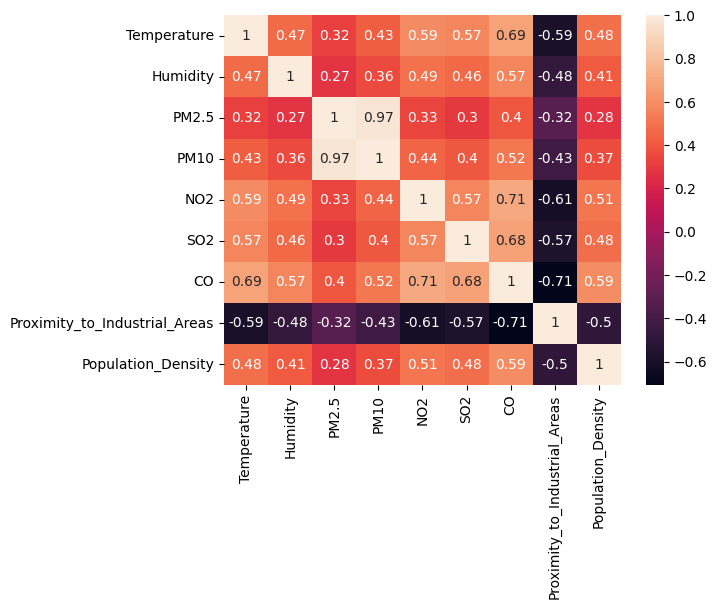

In [ ]:
#Finding a corelation between the input datas
numeric_columns = df.iloc[:, :-1]
correlation_matrix = numeric_columns.corr()
sns.heatmap(numeric_columns.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
# Preparing Input and Output Data
Y=df['Air Quality']
X = df.drop(columns=['Air Quality'])
X.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [ ]:
# Segregating Test and Train Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state = 1)
len(X_train), len(X_test), len(y_train), len(y_test)


(4000, 1000, 4000, 1000)

In [ ]:
#Normalizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree

In [ ]:
#Checking for Max_Depth on the basis of multiple parameters and finding the suitable number for it
dt=DecisionTreeClassifier(random_state=1)
Tree_params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30]}

Masterclf = GridSearchCV(dt, Tree_params, scoring='precision_macro')

Masterclf.fit(X_train_scaled, y_train)
print(Masterclf.best_params_)

{'max_depth': 12}


In [ ]:
Tree_params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30]}

Masterclf = GridSearchCV(dt, Tree_params, scoring='accuracy')

Masterclf.fit(X_train_scaled, y_train)
print(Masterclf.best_params_)

{'max_depth': 12}


In [ ]:
Tree_params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30]}

Masterclf = GridSearchCV(dt, Tree_params, scoring='f1_macro')

Masterclf.fit(X_train_scaled, y_train)
print(Masterclf.best_params_)

{'max_depth': 12}


In [ ]:
Tree_params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30]}

Masterclf = GridSearchCV(dt, Tree_params, scoring='recall_macro')

Masterclf.fit(X_train_scaled, y_train)
print(Masterclf.best_params_)

{'max_depth': 13}


In [ ]:
#taking max depth to maximising accuracy, precision and f1-score
dt = DecisionTreeClassifier(random_state=1, max_depth = 12)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

<Axes: >

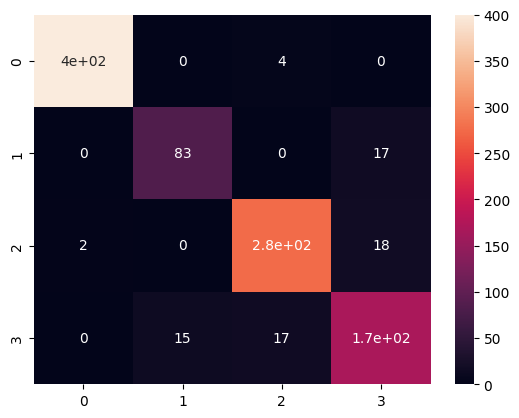

In [ ]:
# Printing out the confusion matrix for the Decision Tree Classifier
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True)




In [ ]:
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, dt_pred))
print("Precision of Decision Tree Classifier: ", precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",  recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ", f1_score(y_test, dt_pred, average='weighted'))
print(classification_report(y_test, dt_pred))

Accuracy of Decision Tree Classifier:  0.927
Precision of Decision Tree Classifier:  0.9272718757522816
Recall of Decision Tree Classifier:  0.927
F1-Score of Decision Tree Classifier:  0.9271148893053914
              precision    recall  f1-score   support

        Good       1.00      0.99      0.99       404
   Hazardous       0.85      0.83      0.84       100
    Moderate       0.93      0.93      0.93       296
        Poor       0.83      0.84      0.83       200

    accuracy                           0.93      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000



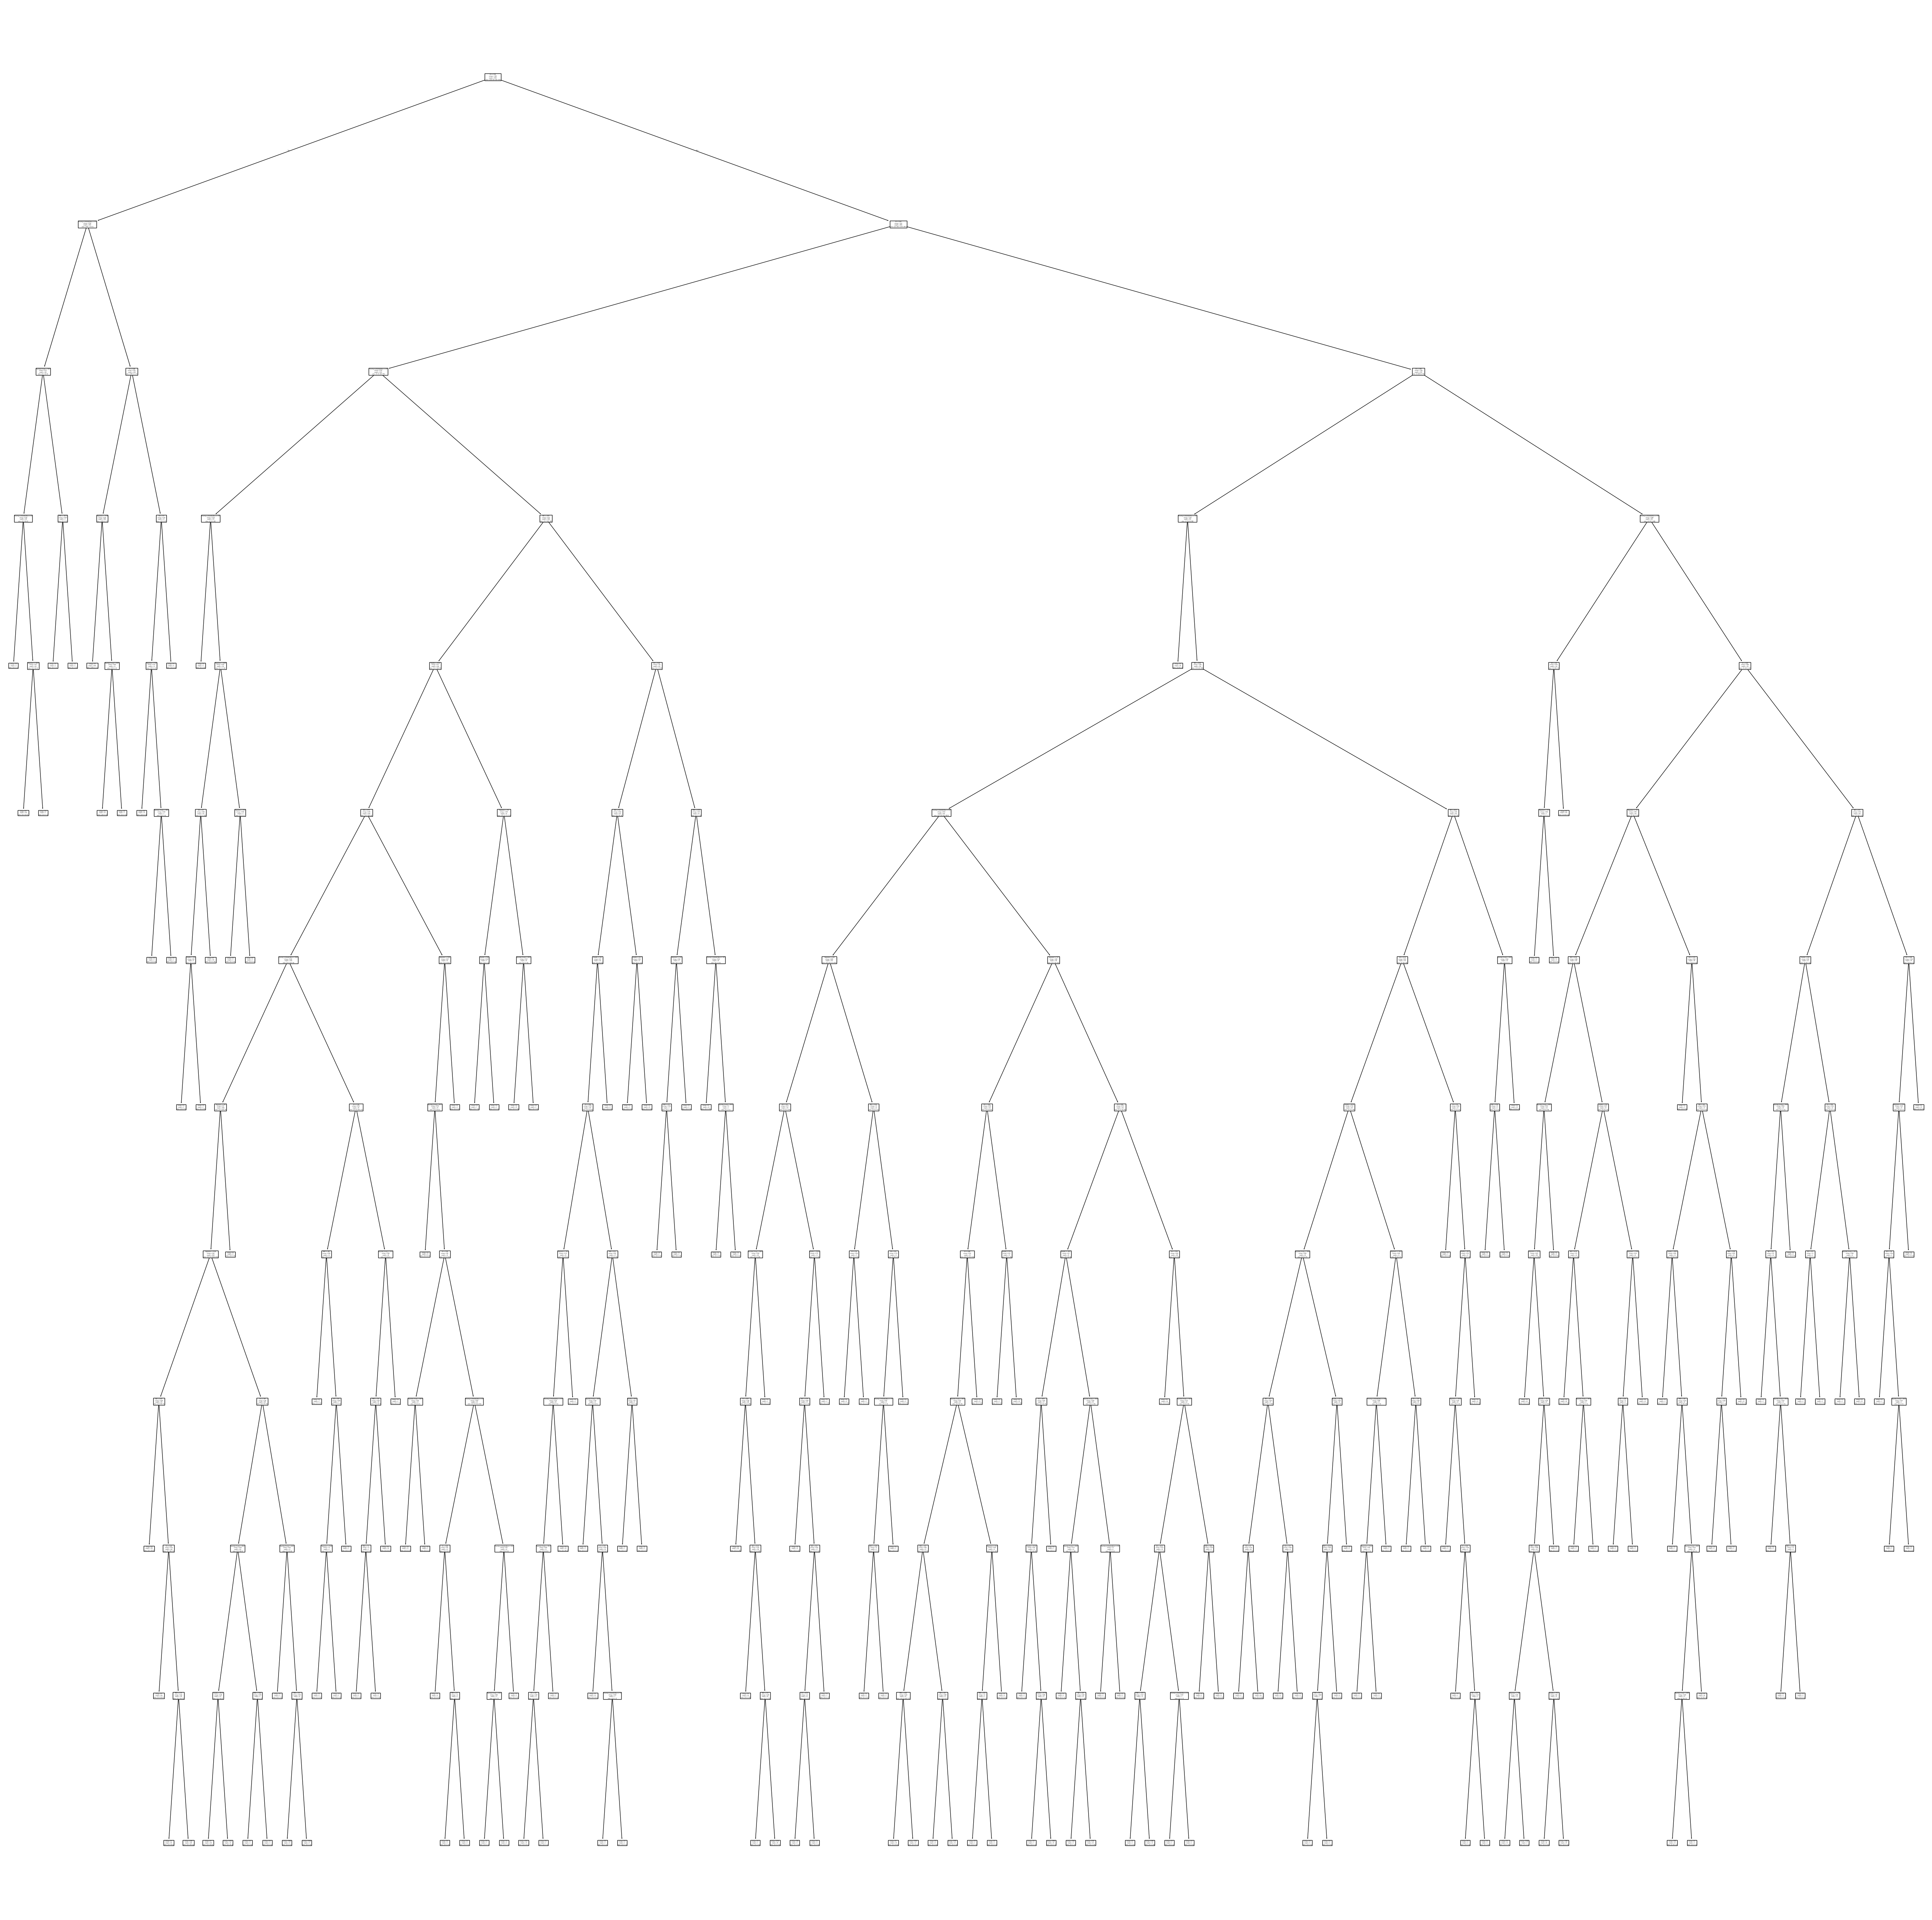

In [ ]:
#Plotting the decision tree for the model
from sklearn import tree
from matplotlib import pyplot as plt
#running the decision tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)
clf.fit(X,Y)
#plotting the tree
fig, ax = plt.subplots(figsize=(70, 70))
tree.plot_tree(clf,ax=ax,feature_names=['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO','Proximity_to_Industrial_Areas','Population_Density'])
plt.show()


Random Forest Classifier

In [ ]:
#Finding Max Depth
rf=RandomForestClassifier(random_state=1, max_depth = 12)
forest_params = {'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30,40,41,43]}
clf = GridSearchCV(rf, forest_params, scoring='accuracy')
clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

{'n_estimators': 41}


In [ ]:
forest_params = {'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30,40,41,43]}

clf = GridSearchCV(rf, forest_params, scoring='precision_macro')

clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

{'n_estimators': 41}


In [ ]:
forest_params = {'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30,40,41,43]}

clf = GridSearchCV(rf, forest_params, scoring='f1_macro')

clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

{'n_estimators': 41}


In [ ]:
forest_params = {'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30,40,41,43]}

clf = GridSearchCV(rf, forest_params, scoring='recall_macro')

clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

{'n_estimators': 41}


In [ ]:
#since appropriate max depth is 41 for all parameters max_depth=41
rf=RandomForestClassifier(random_state=1, max_depth = 41)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

<Axes: >

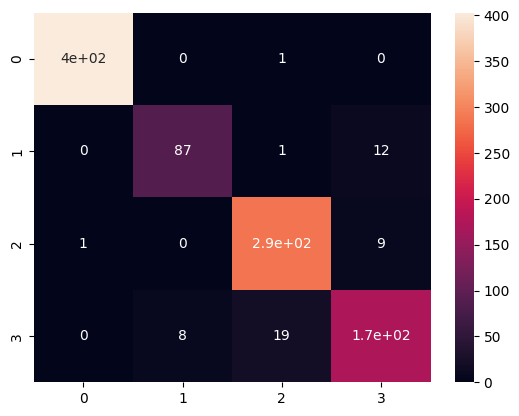

In [ ]:
#Printing Confusion matrix for the outputs
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)

In [ ]:
print("Accuracy of Random Forest Classifier: ", accuracy_score(y_test,rf_pred))
print("Precision of Random Forest Classifier: ",      precision_score(y_test, rf_pred, average='weighted'))
print("Recall of Random Forest Classifier: ",      recall_score(y_test, rf_pred, average='weighted'))
print("F1-Score of Random Forest Classifier: ",      f1_score(y_test, rf_pred, average='weighted'))
print(classification_report(y_test, rf_pred))

Accuracy of Random Forest Classifier:  0.949
Precision of Random Forest Classifier:  0.9486819058290813
Recall of Random Forest Classifier:  0.949
F1-Score of Random Forest Classifier:  0.9486480398994226
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       404
   Hazardous       0.92      0.87      0.89       100
    Moderate       0.93      0.97      0.95       296
        Poor       0.89      0.86      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.93      1000
weighted avg       0.95      0.95      0.95      1000



LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Redistributing the data
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Normalizing the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)

<Axes: >

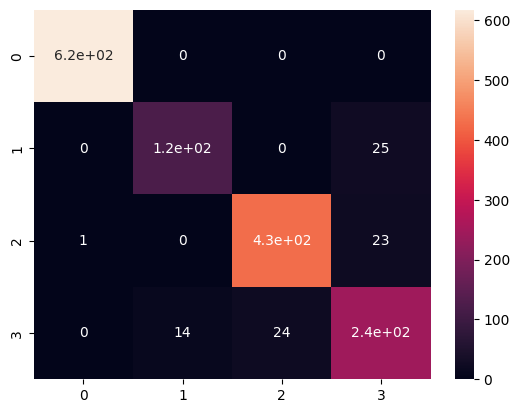

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy of Logistic Regression: ", accuracy_score(y_test,y_pred))
print("Precision of Logistic Regression: ",      precision_score(y_test, y_pred, average='weighted'))
print("Recall of Logistic Regression: ",      recall_score(y_test, y_pred, average='weighted'))
print("F1-Score of Logistic Regression: ",      f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression:  0.942
Precision of Logistic Regression:  0.9423475756893885
Recall of Logistic Regression:  0.942
F1-Score of Logistic Regression:  0.9419979343630879
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.90      0.83      0.86       148
    Moderate       0.95      0.95      0.95       452
        Poor       0.84      0.87      0.85       282

    accuracy                           0.94      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.94      0.94      0.94      1500

